# Welcome, Pythoneers! 
We wil focus on the following topics for today.

**1. Data Manipulation with Pandas Dataframes**

* Creating a dataframe

* Information about a dataframe

* Series

* Reading a dataframe from file

* Working with NA's

* Subsetting dataframes

* Adding new columns

* Pandas Profiling

**2. Plotting**

* Example - Scatterplot with outliers

* Histogram

* Barplot for categorical values

* Grouped barplot

* Seaborn module

**3. Machine Learning with Scikit-learn**

* Data Representation in Scikit-learn

Author: Dr Pranesh Krishnan Ragunathan, Skymind Holdings Berhad


In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# We will use the pandas module because it allows us to work with R-like dataframes
import pandas as pd

# Often we need some functions from numpy as well
import numpy as np

##**1. Data manipulation with Pandas Dataframes**

Pandas dataframe is a convenient structure to work with data and has a lot of 
useful functionality for data analysis. If you are already familiar with R dataframes, then this is something really-really similar.

###**1.1 Creating a dataframe**

A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.

A basic DataFrame, which can be created is an Empty Dataframe.

Example 1 - Creating an Empty Dataframe

In [3]:
#import the pandas library and aliasing as pd
# import pandas as pd # only run this line if you have not import pandas yet
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


Example 2 - Creating a dataframe with Name and Age

In [4]:
# import pandas as pd # only run this line if you have not import pandas yet
data = [['Alex', 10], ['Bob', 12], ['Clarke', 13]]
df = pd.DataFrame(data, columns=['Name', 'Age'])
df

,Name,Age
0,Alex,10
1,Bob,12
2,Clarke,13


In [5]:
# You can create a dataframe from scratch if you want to
# (although probably rarely need it during this course)
# You have to specify column names and data
df = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series([1, 2, 3, 4], dtype='int32'), # you can be very specific about the data types
                    'D' : [4, 2, 3, 4], # if you are not, pandas will try to guess
                    'E' : pd.Categorical(["test", "train", "test", "train"]),
                    'F' : ["test", "train", "test", "train"],
                    'G' : 'foo' })
df

,A,B,C,D,E,F,G
0,1.0,2013-01-02,1,4,test,test,foo
1,1.0,2013-01-02,2,2,train,train,foo
2,1.0,2013-01-02,3,3,test,test,foo
3,1.0,2013-01-02,4,4,train,train,foo


### **1.2 Information about a dataframe**

We can display the informattion about the dataframe fully, or partially, or just the shape or the summary

In [6]:
# To Display on the first few rows

df.head() # first few rows

,A,B,C,D,E,F,G
0,1.0,2013-01-02,1,4,test,test,foo
1,1.0,2013-01-02,2,2,train,train,foo
2,1.0,2013-01-02,3,3,test,test,foo
3,1.0,2013-01-02,4,4,train,train,foo


In [7]:
# To Display the last 2 rows from the bottom

df.tail(2) # last 2 rows

,A,B,C,D,E,F,G
2,1.0,2013-01-02,3,3,test,test,foo
3,1.0,2013-01-02,4,4,train,train,foo


In [8]:
# To Display the dimension of the dataframe

df.shape # dimensions ( rows and columns)

(4, 7)

In [9]:
# To describe the Summary of the dataframe

df.describe() # summary statistics

,A,C,D
count,4.0,4.000000,4.000000
mean,1.0,2.500000,3.250000
std,0.0,1.290994,0.957427
min,1.0,1.000000,2.000000
25%,1.0,1.750000,2.750000
50%,1.0,2.500000,3.500000
75%,1.0,3.250000,4.000000
max,1.0,4.000000,4.000000


### **1.3 Series**

Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.

A pandas Series can be created using the following constructor :−

`pandas.Series(data, index, dtype, copy)`

Example 1 - Creating an Empty series

In [10]:
#import the pandas library and aliasing as pd
# import pandas as pd # only run this line if you have not import pandas yet
s = pd.Series(dtype='float64')
print(s)

Series([], dtype: float64)


In [11]:
# We can also create series - all dataframe columns are also series
s = pd.Series([1, 5, 2, 6, 4, 5])

In [12]:
# And we can count different values in there
s.value_counts()

5    2
1    1
2    1
4    1
6    1
dtype: int64

In [13]:
# As already said, we can do this also on the columns of dataframes
# (these two commands are identical)
df["D"].value_counts()
df.D.value_counts()

4    2
2    1
3    1
Name: D, dtype: int64

### **1.4 Reading a dataframe from file**

In [19]:
# Usually we read the dataset from some file (for example csv), you can download it from the course webpage
irisdf = pd.read_csv("../../datasets/iris.csv", header=None) # Commented out since we are using Colab instead of local machine

In [20]:
# You can read directly from an URL as well
# irisdf = pd.read_csv("https://courses.cs.ut.ee/MTAT.03.227/2018_spring/uploads/Main/iris.csv", header=None)

In [21]:
# We can assign (new) column names
irisdf.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [22]:
# See the data
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Data size
irisdf.shape

(150, 5)

In [24]:
# Ask for specific statistic of a column
irisdf.sepal_length.mean()

5.843333333333334

In [25]:
# Or of all columns
irisdf.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.777181
petal_width     1.212162
dtype: float64

### **1.5 Working with NA's**

In [26]:
# How many NA elements in every column
irisdf.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    1
petal_width     2
species         0
dtype: int64

In [27]:
# Now the shape is
irisdf.shape

(150, 5)

In [28]:
# Remove rows that have NA's
irisdf = irisdf.dropna()

In [29]:
# Now the shape is
irisdf.shape

(147, 5)

In [30]:
# You can also write data to a file
irisdf.to_csv("iris_no_na.csv")

In [31]:
# We can see that we have a typo in one of the class names, let's fix it
irisdf.species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        47
Iris-virginicas     1
Name: species, dtype: int64

In [32]:
# Now we have 3 classes as we should
irisdf.species = irisdf.species.replace("Iris-virginicas", "Iris-virginica")
irisdf.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        47
Name: species, dtype: int64

### **1.6 Subsetting dataframes**

In [33]:
# Selecting only some column/columns (head() command is just for convenient printing)
irisdf["sepal_length"].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [34]:
irisdf[["sepal_length", "sepal_width"]].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [35]:
# Selecting rows based on single condition
irisdf[irisdf["sepal_width"] > 4].head()

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [36]:
# Selecting rows based on two conditions
irisdf[(irisdf["sepal_width"] > 4) & (irisdf["petal_length"] > 1.4)].head()

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa


In [37]:
# Selecting rows based on several conditions
irisdf[(irisdf["sepal_width"] > 4) | ((irisdf["species"] == "Iris-versicolor") & (irisdf["petal_length"] > 1.4))].head()

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor


### **1.7 Adding new columns**

In [38]:
# Adding a new columns
irisdf["petal_sum"] = irisdf["petal_length"] + irisdf["petal_width"]

Here, we will be using lambda functions to perform an operation in DataFrame.

In [39]:
irisdf["petal_max"] = irisdf.apply(lambda row: max([row["petal_length"], row["petal_width"]]), axis=1)

In [40]:
irisdf["flower"] = irisdf.apply(lambda row: "small" if row["sepal_length"] < 5 else "big", axis=1)

In [41]:
irisdf.head()
irisdf.flower.value_counts()

big      128
small     19
Name: flower, dtype: int64

### **1.8 Pandas Profiling**

In [42]:
# import pandas as pd # only run this line if you have not import pandas yet

In [43]:
import pandas_profiling

Note: Only run the following cell if you are using Colab, else the data is available together with this repo.

In [44]:
# from google.colab import files 
# uploaded = files.upload()
# df = pd.read_csv('iris.csv')  # Choose the name of the file you just uploaded

Try running the following cell. If you get errors, run this cell to install the specified version of pandas profiling package.
Note: Normally you would need to do this if you are using Colab.

In [45]:
# !pip install pandas-profiling==2.7.1

In [46]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **2. Plotting**

This functionality on Series and DataFrame is just a simple wrapper around the matplotlib libraries plot() method.



<AxesSubplot:>

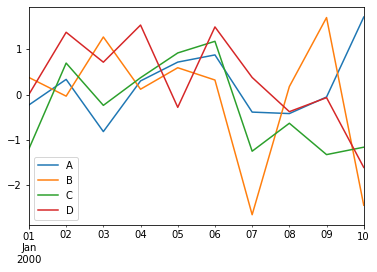

In [47]:
# Only run following line if you have not import modules yet
# import pandas as pd 
# import numpy as np

df = pd.DataFrame(np.random.randn(10,4),index=pd.date_range('1/1/2000', periods=10), columns=list('ABCD'))

df.plot()

In [48]:
import matplotlib.pyplot as plt

# allows to output plots in the notebook
%matplotlib inline 

# makes inline plots to have better quality (can replace svg with retina as well)
%config InlineBackend.figure_format = 'svg'

# can change the default style of plots - google for more choices
plt.style.use("ggplot")

### **2.1 Example 1 - Scatterplot with Outliers**

0.5
Original shape:  (147, 8)
Number of Outliers:  (3, 8)
After outliers removed:  (144, 8)


Text(0.5, 1.0, 'Outliers highlighted')

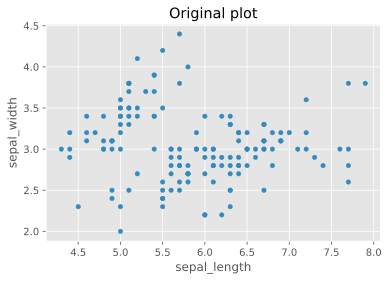

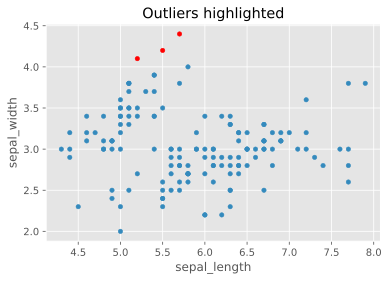

In [49]:
# usual plot
irisplot = irisdf.plot(x="sepal_length", y="sepal_width", kind="scatter")
irisplot.set_title("Original plot")

# calculating IQR (difference between 75% and 25% quantile)
IQR = irisdf["sepal_width"].quantile(0.75) - irisdf["sepal_width"].quantile(0.25) # interquartile range
print(IQR)

# filtering out outliers (rows with "extreme" values - not all of them are actually outliers)
outliers = irisdf[irisdf["sepal_width"] > irisdf["sepal_width"].quantile(0.75) + 1.5*IQR]
print("Original shape: ",irisdf.shape)
print("Number of Outliers: ", outliers.shape)

# remove outliers from other data
usual = irisdf.drop(outliers.index)
print("After outliers removed: ", usual.shape)

# plot outliers with different color
ax = usual.plot(x="sepal_length", y="sepal_width", kind="scatter")
outliers.plot(x="sepal_length", y="sepal_width", kind="scatter", c="red", ax=ax)
ax.set_title("Outliers highlighted")
# ax.set_ylabel("sepal_width")
# ax.set_ylabel("I can change this")
# ax.set_xlim([0,10]);

### **2.2 Histogram**

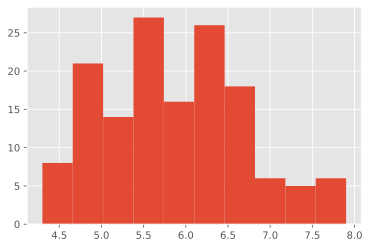

In [50]:
irisdf["sepal_length"].hist();

### **2.3 Barplot for categorical values**

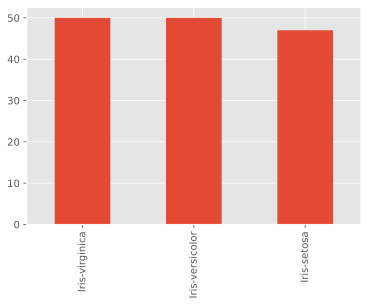

In [51]:
irisdf.species.value_counts().plot(kind="bar");

### **2.4 Grouped barplot**

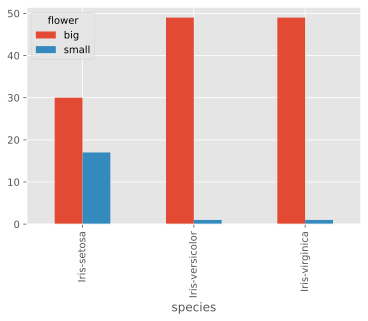

In [52]:
irisdf.groupby(["species", "flower"])["sepal_length"].count().unstack().plot(kind="bar");

### **2.5 Seaborn module**

Seaborn is a plotting module for Python that allows to do some cool and quite complicated plots easily. It might not be in the default installation of Anaconda so you might need to install it (conda install seaborn).

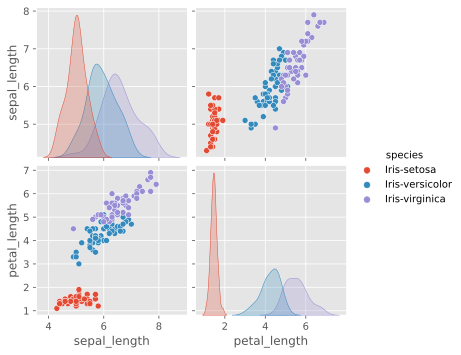

In [53]:
# import seaborn as sns # only run this line if you have not import this module yet

sns.pairplot(irisdf[["sepal_length", "petal_length", "species"]], hue="species");

## **3. Machine Learning with Scikit-learn**

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. 

One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms.
Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation.
A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

### **3.1 Data Representation in Scikit-learn**

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.
The best way to think about data within Scikit-Learn is in terms of tables of data.

**Data as a Table**

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements. For example, consider the Iris dataset, famously analyzed by Ronald Fisher in 1936. We can download this dataset in the form of a Pandas DataFrame using the seaborn library:

In [54]:
# import seaborn as sns # only run this line if you have not import this module yet
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. In general, we will refer to the rows of the matrix as samples, and the number of rows as n_samples.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as n_features

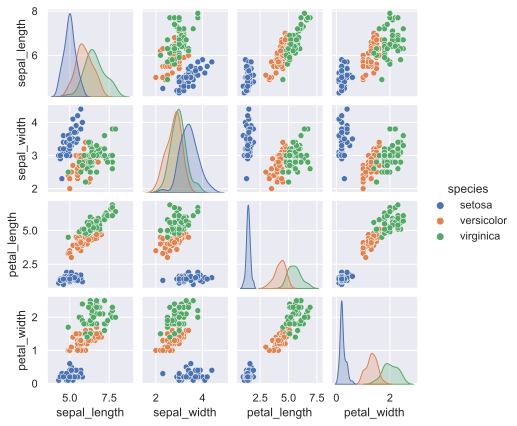

In [55]:
%matplotlib inline
# import seaborn as sns # only run this line if you have not import this module yet
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

### 3.2 Extracting Features from DataFrame

For use in Scikit-Learn, we will extract the features matrix and target array from the DataFrame, which we can do using some of the Pandas DataFrame operations discussed earlier

In [56]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [57]:
y_iris = iris['species']
y_iris.shape

(150,)

To summarize, the expected layout of features and target values is visualize
in the following diagram:

In [58]:
# We have a dataset with numerical and categorical features
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_sum,petal_max,flower
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.4,big
1,4.9,3.0,1.4,0.2,Iris-setosa,1.6,1.4,small
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.3,small
3,4.6,3.1,1.5,0.2,Iris-setosa,1.7,1.5,small
4,5.0,3.6,1.4,0.2,Iris-setosa,1.6,1.4,big


### 3.3 Feature Engineering

Sklearn only works with numeric matrices. This means that we have to convert our categorical values into numeric ones. One way is to use LabelEncoder that associates every category with a number. This way might not always work well because we might introduce an order into the data that might not be true (if "dog", "mouse", "cat" would become 1,2,3, would it mean that mouse is somehow the average of dog and cat?). It is better to do one-hot-encoding and convert every categorical value in a feature into a separate binary feature. Pandas package has a very simple method for doing just that.

In [59]:
from sklearn.preprocessing import LabelEncoder

# We can use LabelEncoder to convert the column flower into a numeric vector, but this might introduce unwanted order
# Here, we are not replacing the label encoded values in the dataframe, but you can do that using assignment operator
# Another method is to use Series.cat.codes
enc = LabelEncoder()
flower_num = enc.fit_transform(irisdf["flower"])
flower_num[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [60]:
# Pandas has a method get_dummies that converts the categorical values of a feature into new binary features
irisdf_dummies = pd.get_dummies(irisdf, columns = ["flower"])
irisdf_dummies.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_sum,petal_max,flower_big,flower_small
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.4,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.6,1.4,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.3,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1.7,1.5,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1.6,1.4,1,0


### 3.4 Splitting a DataFrame into Features and Targets

In [61]:
# Next we can create our training and testing datasets with a train_test_split method
# At the moment train set size will be 75% of the data and test set size 25%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(irisdf_dummies.drop(["species"], axis=1),
                                                    irisdf_dummies.species, test_size=0.25, random_state=0)

In [62]:
# Results of the splitting are Pandas Dataframes (for X_) and Series (for y_)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((110, 8), (37, 8), (110,), (37,))

### 3.5 Perform Supervised Learning

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Next we can fit our model on the training set, we have chosen KNN model with 1 neighbors
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 3.6 Perform Evaluation on Train and Test Set

In [64]:
# We can ask the model to directly calculate the accuracy
knn.score(X_train, y_train)

1.0

In [65]:
knn.score(X_test, y_test)

0.972972972972973

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can also let the model predict the values for the test set
y_pred = knn.predict(X_test)
print(y_pred[:10])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa']


In [67]:
# And calculate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.972972972972973


In [68]:
# Report for other classification measures
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        37
      macro avg       0.98      0.96      0.97        37
   weighted avg       0.97      0.97      0.97        37



In [69]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  1  8]]


# The End

Up to date, you have learn everything from the building blocks of Python to knowing the pipeline of a machine learning project. Normally after evaluation, data scientists / AI engineers will deploy their solution and monitor it for a period of time.

That's it! You are now ready to pick a problem to solve and provide solutions to the domain problem. **Your next task will be:** 

1. Pick a domain.
2. Find a client / stakeholder and understand their domain problem.
3. Define a problem statement.
4. Detail a plan on how to:
 * Find / collect data.
 * Clean the data / perform exploratory data analysis (EDA) to get valuable insights
 * Determine which learning method suitable to your problem statement
 * Perform the training
 * Evaluate your model
 * Deploy your model
 * Monitor your model
5. Pitch your solution to your client / stakeholder and get them onboard. Revise your plan if necessary. Then pitch again.
6. Execute your plan.

And lastly, do not forget to upload your code into your Github and **DOCUMENT THE HELL OUT OF IT (yes, I meant README and comments)**! 

Plus point: Share your experience on Medium and / or LinkedIn.


